In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/hp/Downloads/archive (6)/PMC Hospital Infrastructure.csv")
df

,City Name,Zone Name,Ward Name,Zone No.,Ward No.,Facility Name,Type (Hospital / Nursing Home / Lab),Class : (Public / Private),Pharmacy Available : Yes/No,Number of Beds in Emergency Wards,Number of Beds in facility type,Number of Doctors / Physicians,Number of Nurses,Number of Midwives Professional,Average Monthly Patient Footfall,Ambulance Service Available,Count of Ambulance
0,Pune,kasba - vishrambagwada WO,Ambil Odha,5.0,NaN,"Late Matoshri Ramabai Ambedkar Maternity Home,...",Hospital (Maternity Home),Public,Yes,0,10,2,4,1,4500,Yes,1
1,Pune,Aundh - Baner WO,Aundh,2.0,NaN,"Aundh Kuti Maternity Home, Aundh",Hospital (Maternity Home),Public,Yes,0,14,2,5,2,2500,Yes,1
2,Pune,Aundh - Baner WO,Bopodi,2.0,NaN,Late Draupadabai Murlidhar Khedekar Maternity ...,Hospital (Maternity Home),Public,Yes,0,16,2,4,9,1900,Yes,1
3,Pune,Ghole Road - Shivaji Nagar WO,Shivaji Nagar Station,2.0,NaN,"Dr. Dalvi, PMC Joint Project",Hospital (Maternity Home),Public,Yes,0,30,4,7,9,2400,Yes,2
4,Pune,Hadapsar - Mundhwa WO,Hadapsar,4.0,NaN,"Late Anna Saheb Magar Maternity Home, Hadapsar",Hospital (Maternity Home),Public,Yes,0,20,2,3,6,4500,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,Pune,1,DHOLE-PATIL ROAD,1.0,NaN,Nityashraddha Life Care Hospital,GENERAL,private,N.A.,N.A.,20,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.
733,Pune,1,NAGAR ROAD- VADGOANSHERI,1.0,NaN,Jeevnjyot Nursing Home,GENERAL,private,N.A.,N.A.,10,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.
734,Pune,3,SINGHARD ROAD,3.0,NaN,Dr. Pathak Eye Clinic,OPTHALMOLOGY,private,N.A.,N.A.,2,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.
735,Pune,1,DHOLE-PATIL ROAD,1.0,NaN,Bliz fertility center,GENERAL,private,N.A.,N.A.,3,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.


In [3]:
print(df[["Average Monthly Patient Footfall", "Number of Beds in facility type"]].dtypes)


Average Monthly Patient Footfall    object
Number of Beds in facility type      int64
dtype: object


In [4]:
df["Average Monthly Patient Footfall"] = pd.to_numeric(df["Average Monthly Patient Footfall"], errors="coerce")
df["Number of Beds in facility type"] = pd.to_numeric(df["Number of Beds in facility type"], errors="coerce")

df['bed_occupancy_rate(%)'] = (
    df["Average Monthly Patient Footfall"] /
    (df["Number of Beds in facility type"] * 30) * 100
)
df.head()


,City Name,Zone Name,Ward Name,Zone No.,Ward No.,Facility Name,Type (Hospital / Nursing Home / Lab),Class : (Public / Private),Pharmacy Available : Yes/No,Number of Beds in Emergency Wards,Number of Beds in facility type,Number of Doctors / Physicians,Number of Nurses,Number of Midwives Professional,Average Monthly Patient Footfall,Ambulance Service Available,Count of Ambulance,bed_occupancy_rate(%)
0,Pune,kasba - vishrambagwada WO,Ambil Odha,5.0,NaN,"Late Matoshri Ramabai Ambedkar Maternity Home,...",Hospital (Maternity Home),Public,Yes,0,10,2,4,1,4500.0,Yes,1,1500.000000
1,Pune,Aundh - Baner WO,Aundh,2.0,NaN,"Aundh Kuti Maternity Home, Aundh",Hospital (Maternity Home),Public,Yes,0,14,2,5,2,2500.0,Yes,1,595.238095
2,Pune,Aundh - Baner WO,Bopodi,2.0,NaN,Late Draupadabai Murlidhar Khedekar Maternity ...,Hospital (Maternity Home),Public,Yes,0,16,2,4,9,1900.0,Yes,1,395.833333
3,Pune,Ghole Road - Shivaji Nagar WO,Shivaji Nagar Station,2.0,NaN,"Dr. Dalvi, PMC Joint Project",Hospital (Maternity Home),Public,Yes,0,30,4,7,9,2400.0,Yes,2,266.666667
4,Pune,Hadapsar - Mundhwa WO,Hadapsar,4.0,NaN,"Late Anna Saheb Magar Maternity Home, Hadapsar",Hospital (Maternity Home),Public,Yes,0,20,2,3,6,4500.0,Yes,1,750.000000


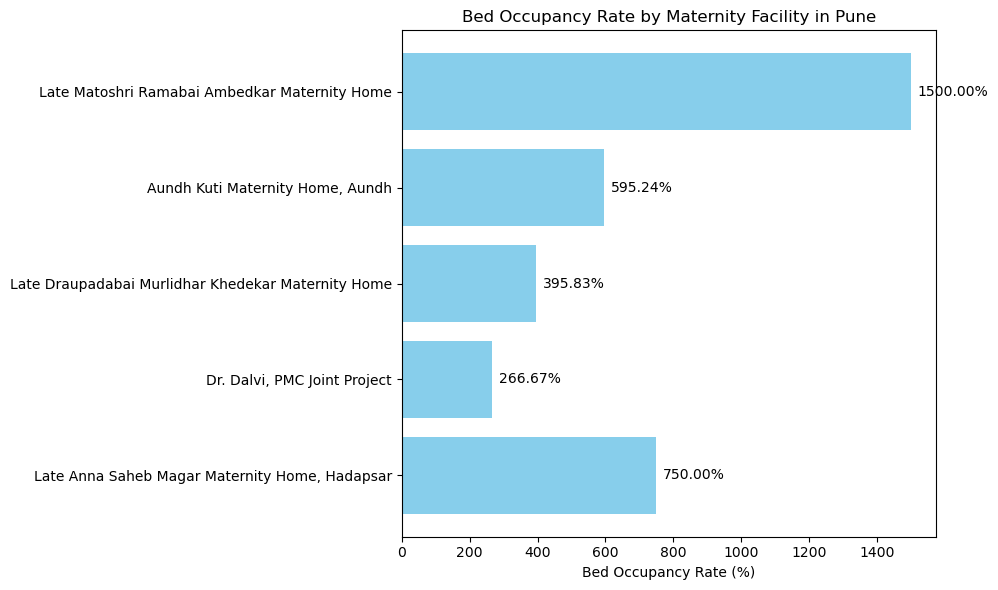

In [ ]:

facilities = [
    "Late Matoshri Ramabai Ambedkar Maternity Home",
    "Aundh Kuti Maternity Home, Aundh",
    "Late Draupadabai Murlidhar Khedekar Maternity Home",
    "Dr. Dalvi, PMC Joint Project",
    "Late Anna Saheb Magar Maternity Home, Hadapsar"
]

occupancy_rates = [1500.0, 595.24, 395.83, 266.67, 750.0]


plt.figure(figsize=(10, 6))
bars = plt.barh(facilities, occupancy_rates, color='skyblue')
plt.xlabel("Bed Occupancy Rate (%)")
plt.title("Bed Occupancy Rate by Maternity Facility in Pune")
plt.gca().invert_yaxis()  

for bar in bars:
    width = bar.get_width()
    plt.text(width + 20, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}%', va='center')

plt.tight_layout()
plt.show()